In [13]:
import pandas as pd
import torch, torchvision
import json

from digit_recognition.mnist import label

In [1]:
import zipfile
import os

zip_path = 'data/archive.zip'
extract_to = 'data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [15]:
DATASET_PATH = 'data/images'

with open('data/cat_to_name.json', 'r') as f:
    CATEGORY_NAMES = json.load(f)

In [26]:
class OxfordFlowers(torch.utils.data.Dataset):
    def __init__(self, data_path, split='train'):
        self.__data_path = data_path
        self.__split = split
        self.img_and_labels = self.__create_labels()    # (image, label) list of tuples

    # Create a list of tuples (image, label) from file
    def __create_labels(self):
        split_folder = os.path.join(self.__data_path, self.__split)   # 'data/images/train' etc.
        labels = sorted(os.listdir(split_folder))
        label_to_idx = {name: idx for idx, name in enumerate(labels)}   # {"1":0, "2":1...}

        img_and_labels = []
        for label in labels:
            label_folder = os.path.join(split_folder, label)
            for file in os.listdir(label_folder):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    filename = os.path.join(label_folder, file)
                    img_and_labels.append((filename,label_to_idx[label]))
        return img_and_labels

    def __len__(self):
        return len(self.img_and_labels)

    def __getitem__(self, idx):
        filename, label = self.img_and_labels[idx]
        image = torchvision.io.read_image(filename).float()/255.0
        return image, label


In [30]:
training_data = OxfordFlowers(DATASET_PATH, split='train')
valid_data = OxfordFlowers(DATASET_PATH, split='valid')

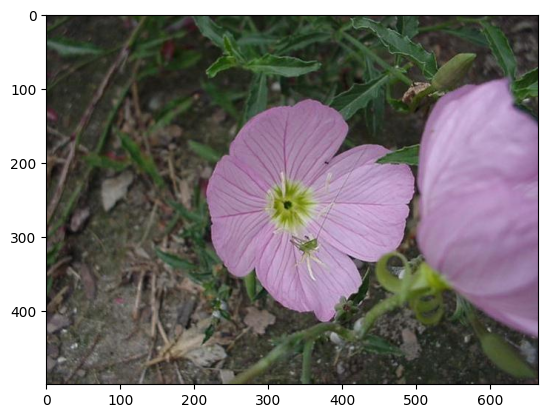

In [44]:
plt.imshow(training_data[0][0].permute(1, 2, 0).numpy())

In [38]:
import matplotlib.pyplot as plt

grid = torchvision.utils.make_grid(training_data[:16], nrow=4).permute(1, 2, 0).numpy() # Slicing onyl works with DataLoader
plt.imshow(grid)
plt.axis('off')
plt.show()

TypeError: list indices must be integers or slices, not tuple